# Installation

In [5]:
!pip install pandas
!pip install opencv-python==4.6.0.66
!pip install seaborn
!pip install scikit-learn

# Import

In [6]:
import numpy as np
import pandas as pd 


import os
for dirname, _, filenames in os.walk('C:/Users/Admin/Downloads/Thesis Code/AutismDataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import random
import os

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models, Sequential
from tensorflow.keras import optimizers

from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, SeparableConv2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.applications.vgg16 import VGG16

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve

C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0001.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0002.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0003.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0004.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0005.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0006.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0007.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0008.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0009.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0010.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0011.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0012.jpg
C:/Users/Admin/D

# Train & Test Directories 

In [12]:
train_data = "C:/Users/Admin/Downloads/Thesis Code/AutismDataset/train"
test_data = "C:/Users/Admin/Downloads/Thesis Code/AutismDataset/test"

# Splitting Autistic & Non-Autistic

In [13]:
train_non_autistic = []
train_autistic = []

for i in os.listdir(train_data):
    if 'Non_Autistic' in i:
        train_non_autistic.append(os.path.join(train_data, i))
    else:
        train_autistic.append(os.path.join(train_data, i))

test_non_autistic = []
test_autistic = []

for i in os.listdir(test_data):
    if 'Non_Autistic' in i:
        test_non_autistic.append(os.path.join(test_data, i))
    else:
        test_autistic.append(os.path.join(test_data, i))

In [14]:
train_imgs = train_autistic + train_non_autistic
random.shuffle(train_imgs)

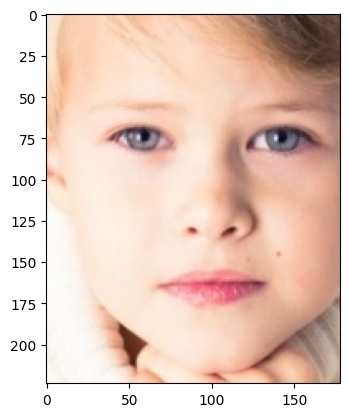

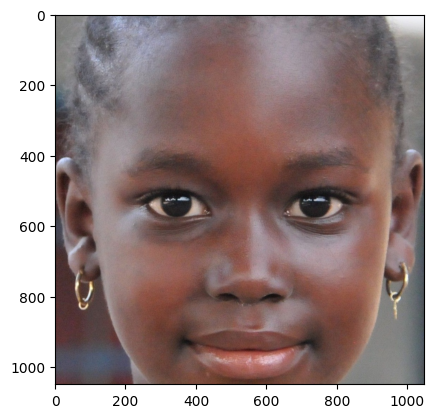

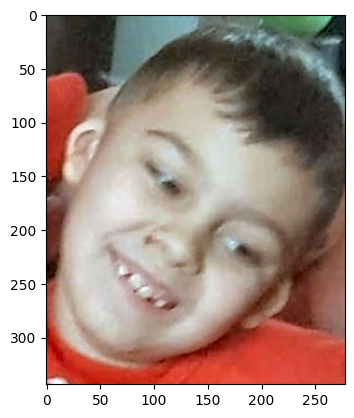

In [15]:
import matplotlib.image as mpimg
for ima in train_imgs[0:3]:
    img=mpimg.imread(ima)
    imgplot = plt.imshow(img)
    plt.show()

# Resizing The Images

In [16]:
def read_and_process_image(list_of_images):
    X = []
    y = []
    
    for image in list_of_images:
        X.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (224, 224), interpolation = cv2.INTER_CUBIC))
        if 'Non_Autistic' in image:
            y.append(0)
        else:
            y.append(1)
            
    return X,y

X_train, y_train = read_and_process_image(train_imgs)


# Validation Data

In [17]:
val_autistic = "/Users/Admin/Downloads/Thesis Code/AutismDataset/valid/Autistic"
val_non_autistic = "/Users/Admin/Downloads/Thesis Code/AutismDataset/valid/Non_Autistic"
val_autistic_imgs = ["/Users/Admin/Downloads/Thesis Code/AutismDataset/valid/Autistic/{}".format(i) for i in os.listdir(val_autistic)]
val_non_autistic_imgs = ["/Users/Admin/Downloads/Thesis Code/AutismDataset/valid/Non_Autistic/{}".format(i) for i in os.listdir(val_non_autistic)]
val_imgs = val_autistic_imgs + val_non_autistic_imgs
random.shuffle(val_imgs)

In [18]:
X_val, y_val = read_and_process_image(val_imgs)

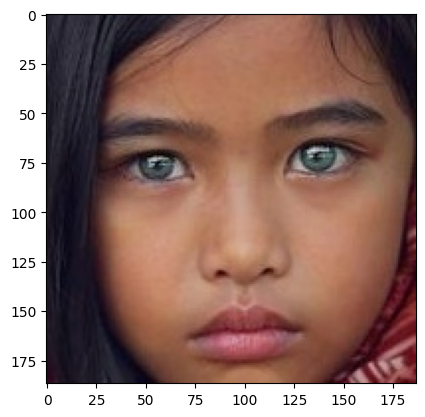

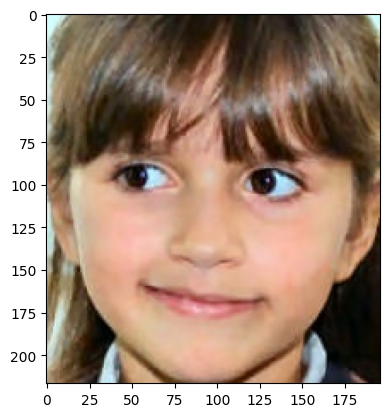

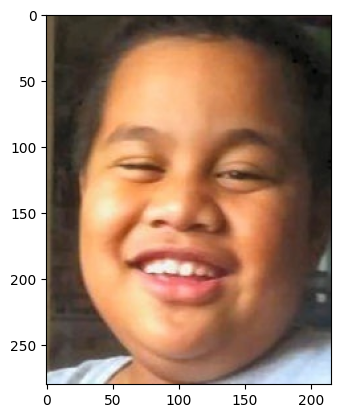

In [19]:
import matplotlib.image as mpimg
for ima in val_imgs[0:3]:
    img=mpimg.imread(ima)
    imgplot = plt.imshow(img)
    plt.show()

# Converting Train & Val Data To np Array


In [20]:
X_val = np.array(X_val)
y_val = np.array(y_val)
X_train = np.array(X_train)
y_train = np.array(y_train)

# Shape Of Data

In [21]:
print("Shape of Train images:", X_train.shape)
print("Shape of Train labels:", y_train.shape)
print("Shape of validation images:", X_val.shape)
print("Shape of validation labels:", y_val.shape)

Shape of Train images: (2540, 224, 224, 3)
Shape of Train labels: (2540,)
Shape of validation images: (100, 224, 224, 3)
Shape of validation labels: (100,)


# Preprocessing Hia

# Preprocessing Jerin

# Data Augmentation

In [28]:
# Generating Larger DataSet
## Data Augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=4,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

# Train Model
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
val_generator = val_datagen.flow(X_val, y_val, batch_size=32)


In [29]:
# train_generator = train_datagen.flow(X_train, y_train, batch_size = 32)
# val_generator = val_datagen.flow(X_val, y_val, batch_size = 32)

# Train Model

In [30]:
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=val_generator,
                    workers=4,
                    use_multiprocessing=False)

Epoch 1/10
80/80 [==============================] - 36s 436ms/step - loss: 0.5596 - acc: 0.7004 - val_loss: 0.5855 - val_acc: 0.6500
Epoch 2/10
80/80 [==============================] - 69s 864ms/step - loss: 0.5328 - acc: 0.7232 - val_loss: 0.5245 - val_acc: 0.7500
Epoch 3/10
80/80 [==============================] - 178s 2s/step - loss: 0.5334 - acc: 0.7291 - val_loss: 0.5051 - val_acc: 0.7400
Epoch 4/10
80/80 [==============================] - 198s 2s/step - loss: 0.5364 - acc: 0.7232 - val_loss: 0.5038 - val_acc: 0.7600
Epoch 5/10
80/80 [==============================] - 198s 2s/step - loss: 0.5176 - acc: 0.7496 - val_loss: 0.5186 - val_acc: 0.7300
Epoch 6/10
80/80 [==============================] - 198s 2s/step - loss: 0.5218 - acc: 0.7335 - val_loss: 0.4786 - val_acc: 0.7800
Epoch 7/10
80/80 [==============================] - 199s 2s/step - loss: 0.5213 - acc: 0.7303 - val_loss: 0.4894 - val_acc: 0.7500
Epoch 8/10
80/80 [==============================] - 206s 3s/step - loss: 0.5322

# Plotting Accuracy

In [31]:
# history_df = pd.DataFrame(history.history)
# history_df

,loss,acc,val_loss,val_acc
0,0.559602,0.700394,0.585525,0.65
1,0.532804,0.723228,0.524516,0.75
2,0.533434,0.729134,0.505069,0.74
3,0.536378,0.723228,0.503780,0.76
4,0.517605,0.749606,0.518580,0.73
5,0.521804,0.733465,0.478581,0.78
6,0.521267,0.730315,0.489424,0.75
7,0.532213,0.736614,0.474677,0.81
8,0.506909,0.750787,0.503566,0.74
9,0.524201,0.727953,0.532692,0.71


# Training & Val Acc

Text(0.5, 1.0, 'Training and Validation Accuracy')

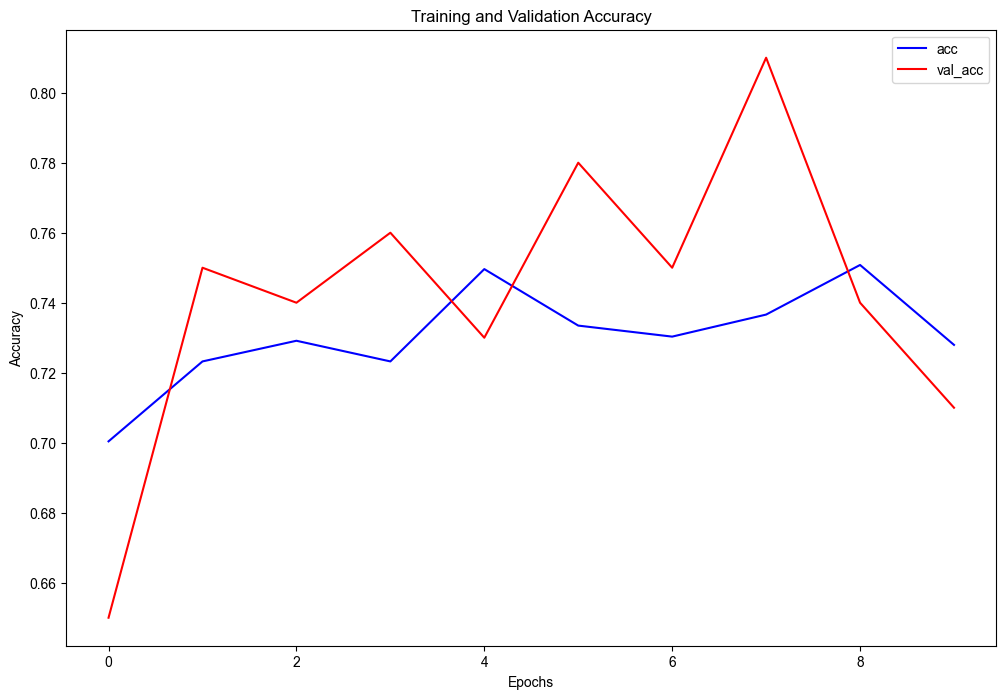

In [32]:
# plt.figure(figsize=(12, 8))
# sns.lineplot(data=history_df.loc[:, ["acc", "val_acc"]], palette=['b', 'r'], dashes=False)
# sns.set_style("whitegrid")
# plt.xlabel("Epochs")
# plt.ylabel("Accuracy")
# plt.title("Training and Validation Accuracy")

# Training And Val Loss

Text(0.5, 1.0, 'Training and Validation Loss')

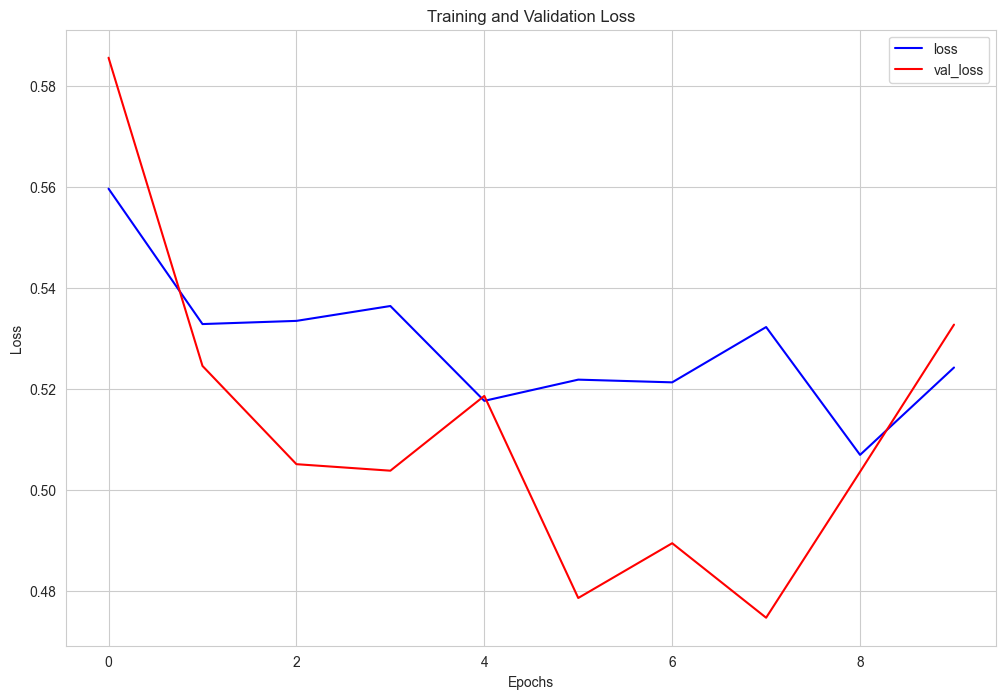

In [33]:
# plt.figure(figsize=(12, 8))
# sns.lineplot(data=history_df.loc[:, ["loss", "val_loss"]], palette=['b', 'r'], dashes=False)
# sns.set_style("whitegrid")
# plt.xlabel("Epochs")
# plt.ylabel("Loss")
# plt.title("Training and Validation Loss")

# Test Data

In [34]:
test_autistic = "/Users/Admin/Downloads/Thesis Code/AutismDataset/test/Autistic"
test_non_autistic = "/Users/Admin/Downloads/Thesis Code/AutismDataset/test/Non_Autistic"
test_autistic_imgs = ["/Users/Admin/Downloads/Thesis Code/AutismDataset/test/Autistic/{}".format(i) for i in os.listdir(val_autistic)]
test_non_autistic_imgs = ["/Users/Admin/Downloads/Thesis Code/AutismDataset/test/Non_Autistic/{}".format(i) for i in os.listdir(val_non_autistic)]
test_imgs = val_autistic_imgs + val_non_autistic_imgs
random.shuffle(val_imgs)
X_test, y_test = read_and_process_image(test_imgs)
X = np.array(X_test)

# Prediction

In [35]:
# pred = model.predict(X)
# threshold = 0.5
# predictions = np.where(pred > threshold, 1,0)

4/4 [==============================] - 2s 424ms/step


## Model Accuracy

In [36]:
# model_accuracy = accuracy_score(y_test, predictions)
# print("Model Accuracy: {:.2f}%".format(model_accuracy * 100))

Model Accuracy: 67.00%


## Classification Report

In [37]:
# cl_report = classification_report(y_test, predictions)
# print(cl_report)

              precision    recall  f1-score   support

           0       0.62      0.88      0.73        50
           1       0.79      0.46      0.58        50

    accuracy                           0.67       100
   macro avg       0.71      0.67      0.65       100
weighted avg       0.71      0.67      0.65       100



## Confusion Matrix 

In [38]:
# cn_matrix= confusion_matrix(y_test, predictions)
# cn_matrix

array([[44,  6],
       [27, 23]], dtype=int64)

## Plotting the True Positives, True Negatives, False Positives and False Negatives 

Text(0.5, 1.0, 'Confusion Matrix')

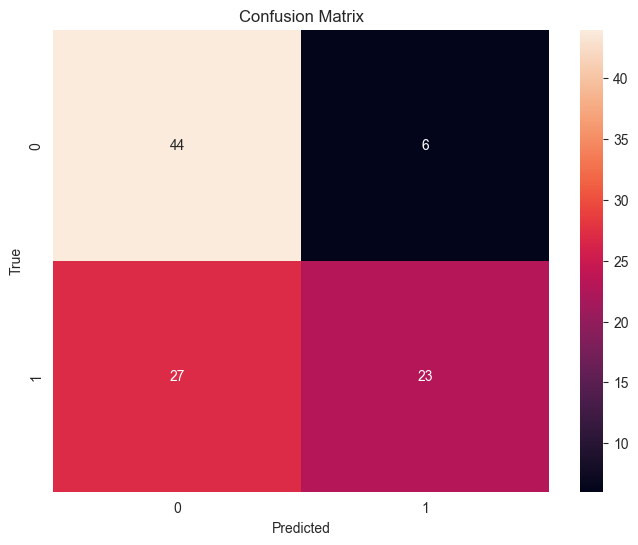

In [39]:
# # Plotting the True Positives, True Negatives, False Positives and False Negatives from model's predictions
# f, ax = plt.subplots(figsize = (8,6))
# ax = sns.heatmap(cn_matrix, annot=True)
# ax.set_xlabel("Predicted")
# ax.set_ylabel("True")
# ax.set_title("Confusion Matrix")

# Saving The Model To Use In Web Interface

In [40]:
model.save("autism_74_2.h5")